# Mini projet - Appstore Games

*Maxime DUBOST - M1 IoT - 16/11/2020*

# Définition de la tâche

Le but de ce projet sera d'observer les notes moyennes attribuées aux applications en fonction de l'année de publication de ces applications

# Nettoyage des données

Tout d'abord, importons les librairies nécessaires ainsi que le dataset :

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('https://raw.githubusercontent.com/MaximeDubost/appstore_games/master/appstore_games.csv')

Affichons le dataset :

In [257]:
df.dtypes

URL                              object
ID                                int64
Name                             object
Subtitle                         object
Icon URL                         object
Average User Rating             float64
User Rating Count               float64
Price                           float64
In-app Purchases                 object
Description                      object
Developer                        object
Age Rating                       object
Languages                        object
Size                            float64
Primary Genre                    object
Genres                           object
Original Release Date            object
Current Version Release Date     object
dtype: object

Observons le dataset d'origine. Le but est premièrement de ne garder que les colonnes utiles à notre étude. Dans notre cas, il s'agit du nom (Name), de la moyenne des notes des utilisateurs (Average User Rating), ainsi que de la date de publication de l'application (Original Release Date) au format année. Nous en profitons également pour renommer plus simplement ces colonnes.

In [261]:
year = pd.DatetimeIndex(df['Original Release Date']).year
df = pd.DataFrame({"name": df["Name"], "avg_user_rating": df["Average User Rating"], "year": year})
df.isna().sum()

name                  0
avg_user_rating    9446
year                  0
dtype: int64

Nous pouvons voir qu'une colonne a 9446 lignes vides. Afin de faciliter notre traitement, nous n'allons pas inclure ces lignes dans notre étude.

In [263]:
df = df.loc[df.avg_user_rating.notnull(), ['name', 'avg_user_rating','year']]
df.isna().sum()

name               0
avg_user_rating    0
year               0
dtype: int64

In [264]:
df.shape

(7561, 3)

Nous travaillerons donc avec ce dataset final de 3 colonnes et de 7561 lignes.

# Analyse des données

Voici la tête de notre dataset :

In [265]:
df.head()

,name,avg_user_rating,year
0,Sudoku,4.0,2008
1,Reversi,3.5,2008
2,Morocco,3.0,2008
3,Sudoku (Free),3.5,2008
4,Senet Deluxe,3.5,2008


Et voici les statistiques descriptives de notre dataset :

In [266]:
df.describe()

,avg_user_rating,year
count,7561.000000,7561.000000
mean,4.060905,2014.856236
std,0.751428,2.610184
min,1.000000,2008.000000
25%,3.500000,2013.000000
50%,4.500000,2015.000000
75%,4.500000,2017.000000
max,5.000000,2019.000000


Visualisons les données sous forme de diagrammes de répartition des données (type gaussienne sur les données) :

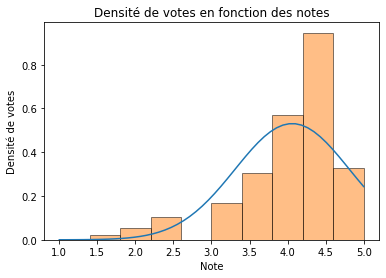

In [276]:
std = np.std(df.avg_user_rating, ddof=1)
mean = np.mean(df.avg_user_rating)
domain = np.linspace(np.min(df.avg_user_rating), np.max(df.avg_user_rating))
plt.plot(domain, norm.pdf(domain, mean, std))
plt.hist(df.avg_user_rating, edgecolor = 'black', alpha = 0.5, density = True)
plt.title('Densité de votes en fonction des notes')
plt.xlabel('Note')
plt.ylabel('Densité de votes')
plt.show()

Visualisons les données sous forme d'histogramme :

Text(0, 0.5, 'Fréquence')

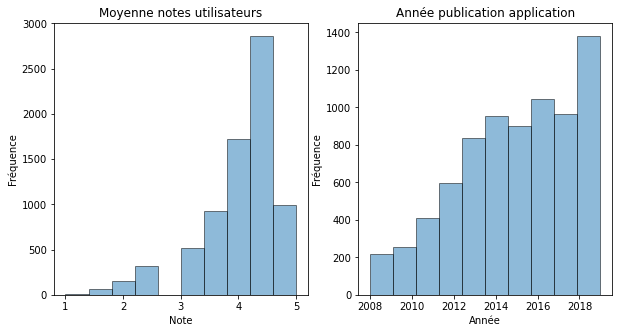

In [280]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df.avg_user_rating, edgecolor = 'black', alpha = 0.5)
plt.title('Moyenne notes utilisateurs')
plt.xlabel('Note')
plt.ylabel('Fréquence')
plt.subplot(1, 2, 2)
plt.hist(df.year, edgecolor = 'black', alpha = 0.5)
plt.title('Année publication application')
plt.xlabel('Année')
plt.ylabel('Fréquence')

Visualisation des données sour forme de boîtes à moustache :

Text(0, 0.5, 'Année')

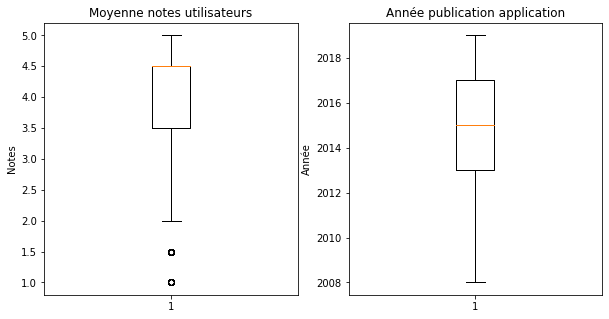

In [281]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df.avg_user_rating)
plt.title('Moyenne notes utilisateurs')
plt.ylabel('Notes')
plt.subplot(1, 2, 2)
plt.boxplot(df.year)
plt.title('Année publication application')
plt.ylabel('Année')